In [16]:
import numpy as np
import pandas as pd
import os
import json
from sklearn.model_selection  import train_test_split

## load preprocessed data

In [17]:
DATA_IN_PATH = './data_in/'
DATA_OUT_PATH = './data_out/'

TRAIN_Q1_DATA_FILE = 'train_q1.npy'
TRAIN_Q2_DATA_FILE = 'train_q2.npy'
TRAIN_LABEL_DATA_FILE = 'train_label.npy'


# 훈련 데이터 가져오는 부분이다.
train_q1_data = np.load(open(DATA_IN_PATH + TRAIN_Q1_DATA_FILE, 'rb'))
train_q2_data = np.load(open(DATA_IN_PATH + TRAIN_Q2_DATA_FILE, 'rb'))
train_labels = np.load(open(DATA_IN_PATH + TRAIN_LABEL_DATA_FILE, 'rb'))

In [18]:
train_input = np.stack((train_q1_data, train_q2_data), axis=1) 

In [19]:
train_input[0]

array([[-0.2036441 , -0.25852767,  0.7137311 ,  0.34551328,  0.18064386,
        -1.2109325 , -0.4901097 ,  0.32363153,  0.12824418,  0.73766047,
         0.36027208, -0.11828172,  0.66858363,  0.50854117, -0.04962504,
         1.1292578 ,  1.101618  ,  0.30984288,  1.3941884 , -0.47841993,
         0.7360469 ,  0.04791623, -0.11149144, -1.4682968 , -1.0143666 ,
        -0.79400295, -0.42924687, -1.2050138 ,  1.3295484 , -1.1424948 ,
         0.46870545, -0.775016  ,  0.6745307 , -0.17207696,  0.36568242,
        -0.17599039,  0.9117183 , -0.70400906, -0.3362569 , -1.0467103 ],
       [-0.18717048, -0.257712  ,  0.5613076 ,  0.42477027,  0.32323435,
        -1.0532584 , -0.58903825,  0.23431733,  0.10017003,  0.77138686,
         0.5003002 , -0.2368725 ,  0.4384388 ,  0.6878991 , -0.22485921,
         0.92590946,  1.0949852 ,  0.5463831 ,  1.3644971 , -0.57346374,
         0.56461555,  0.02058176,  0.01845435, -1.3526016 , -1.1148905 ,
        -0.74600625, -0.17667696, -1.1219032 ,  1.

In [20]:
print(train_q1_data.shape)

(298526, 40)


In [21]:
print(train_input.shape)

(298526, 2, 40)


In [22]:
print(train_labels.shape)

(298526,)


## Train Eval split

In [23]:
train_input, eval_input, train_label, eval_label = train_test_split(train_input, train_labels, test_size=0.2, random_state=4242)

In [24]:
import xgboost as xgb

In [25]:
# train_input => (238820, 2, 31)
# train_input.sum(axis=1) => (238820, 31)

train_data = xgb.DMatrix(train_input.sum(axis=1), label=train_label) # 학습 데이터 읽어 오기
eval_data = xgb.DMatrix(eval_input.sum(axis=1), label=eval_label) # 평가 데이터 읽어 오기

data_list = [(train_data, 'train'), (eval_data, 'valid')]

In [26]:
params = {
    'objective':'binary:logistic',
    'eval_metric':'rmse',  
} # 인자를 통해 XGB모델에 넣어 주자 
#params['objective'] = 'binary:logistic' # 로지스틱 예측을 통해서 
#params['eval_metric'] = 'rmse' # root mean square error를 사용  

bst = xgb.train(params, train_data, num_boost_round = 2500, evals = data_list, early_stopping_rounds=100)

[0]	train-rmse:0.49389	valid-rmse:0.49414
[1]	train-rmse:0.48977	valid-rmse:0.49045
[2]	train-rmse:0.48660	valid-rmse:0.48750
[3]	train-rmse:0.48400	valid-rmse:0.48535
[4]	train-rmse:0.48182	valid-rmse:0.48353
[5]	train-rmse:0.48031	valid-rmse:0.48230
[6]	train-rmse:0.47899	valid-rmse:0.48131
[7]	train-rmse:0.47772	valid-rmse:0.48044
[8]	train-rmse:0.47663	valid-rmse:0.47972
[9]	train-rmse:0.47564	valid-rmse:0.47907
[10]	train-rmse:0.47475	valid-rmse:0.47855
[11]	train-rmse:0.47358	valid-rmse:0.47774
[12]	train-rmse:0.47283	valid-rmse:0.47736
[13]	train-rmse:0.47206	valid-rmse:0.47685
[14]	train-rmse:0.47110	valid-rmse:0.47620
[15]	train-rmse:0.47048	valid-rmse:0.47590
[16]	train-rmse:0.46985	valid-rmse:0.47555
[17]	train-rmse:0.46941	valid-rmse:0.47533
[18]	train-rmse:0.46852	valid-rmse:0.47482
[19]	train-rmse:0.46828	valid-rmse:0.47473
[20]	train-rmse:0.46784	valid-rmse:0.47448
[21]	train-rmse:0.46715	valid-rmse:0.47411
[22]	train-rmse:0.46666	valid-rmse:0.47392
[23]	train-rmse:0.465

[189]	train-rmse:0.42244	valid-rmse:0.46568
[190]	train-rmse:0.42212	valid-rmse:0.46566
[191]	train-rmse:0.42193	valid-rmse:0.46569
[192]	train-rmse:0.42181	valid-rmse:0.46565
[193]	train-rmse:0.42161	valid-rmse:0.46564
[194]	train-rmse:0.42143	valid-rmse:0.46566
[195]	train-rmse:0.42127	valid-rmse:0.46566
[196]	train-rmse:0.42112	valid-rmse:0.46569
[197]	train-rmse:0.42092	valid-rmse:0.46571
[198]	train-rmse:0.42062	valid-rmse:0.46575
[199]	train-rmse:0.42046	valid-rmse:0.46575
[200]	train-rmse:0.42036	valid-rmse:0.46574
[201]	train-rmse:0.42026	valid-rmse:0.46574
[202]	train-rmse:0.42014	valid-rmse:0.46572
[203]	train-rmse:0.41989	valid-rmse:0.46568
[204]	train-rmse:0.41967	valid-rmse:0.46567
[205]	train-rmse:0.41949	valid-rmse:0.46568
[206]	train-rmse:0.41941	valid-rmse:0.46570
[207]	train-rmse:0.41918	valid-rmse:0.46566
[208]	train-rmse:0.41907	valid-rmse:0.46564
[209]	train-rmse:0.41885	valid-rmse:0.46567
[210]	train-rmse:0.41866	valid-rmse:0.46570
[211]	train-rmse:0.41848	valid-r

[376]	train-rmse:0.39103	valid-rmse:0.46565
[377]	train-rmse:0.39087	valid-rmse:0.46567
[378]	train-rmse:0.39075	valid-rmse:0.46572
[379]	train-rmse:0.39069	valid-rmse:0.46572
[380]	train-rmse:0.39052	valid-rmse:0.46570
[381]	train-rmse:0.39027	valid-rmse:0.46570
[382]	train-rmse:0.39015	valid-rmse:0.46567
[383]	train-rmse:0.38996	valid-rmse:0.46566
[384]	train-rmse:0.38980	valid-rmse:0.46565
[385]	train-rmse:0.38963	valid-rmse:0.46566
[386]	train-rmse:0.38946	valid-rmse:0.46565
[387]	train-rmse:0.38932	valid-rmse:0.46567
[388]	train-rmse:0.38923	valid-rmse:0.46568
[389]	train-rmse:0.38910	valid-rmse:0.46570
[390]	train-rmse:0.38894	valid-rmse:0.46568
[391]	train-rmse:0.38873	valid-rmse:0.46570
[392]	train-rmse:0.38864	valid-rmse:0.46571
[393]	train-rmse:0.38855	valid-rmse:0.46573
[394]	train-rmse:0.38837	valid-rmse:0.46570
[395]	train-rmse:0.38823	valid-rmse:0.46572
[396]	train-rmse:0.38804	valid-rmse:0.46572
[397]	train-rmse:0.38790	valid-rmse:0.46570
[398]	train-rmse:0.38771	valid-r

In [27]:
TEST_Q1_DATA_FILE = 'test_q1.npy'
TEST_Q2_DATA_FILE = 'test_q2.npy'
TEST_ID_DATA_FILE = 'test_id.npy'

test_q1_data = np.load(open(DATA_IN_PATH + TEST_Q1_DATA_FILE, 'rb'),allow_pickle=True)
test_q2_data = np.load(open(DATA_IN_PATH + TEST_Q2_DATA_FILE, 'rb'),allow_pickle=True)
test_id_data = np.load(open(DATA_IN_PATH + TEST_ID_DATA_FILE, 'rb'),allow_pickle=True)

## Predict

In [28]:
test_input = np.stack((test_q1_data, test_q2_data), axis=1) 
test_data = xgb.DMatrix(test_input.sum(axis=1))
test_predict = bst.predict(test_data)

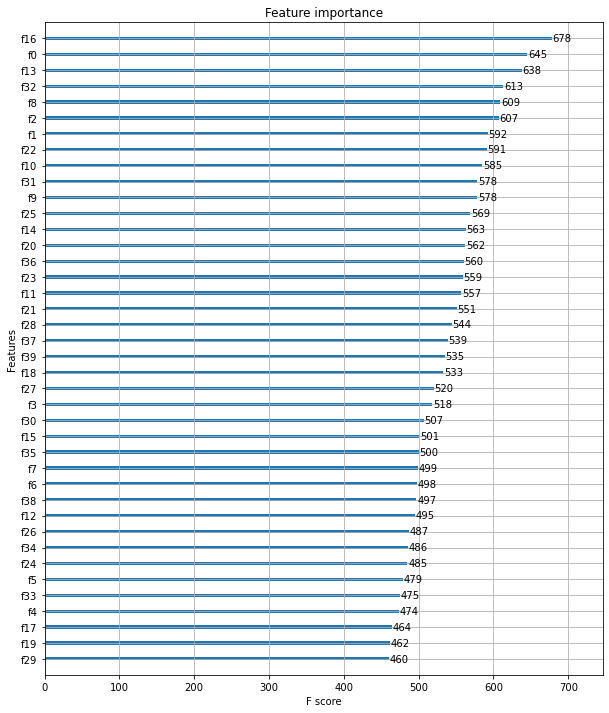

In [29]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig ,ax = plt.subplots(figsize=(10,12))
plot_importance(bst,ax=ax)
plt.show()

In [30]:
if not os.path.exists(DATA_OUT_PATH):
    os.makedirs(DATA_OUT_PATH)
    
output = pd.DataFrame({'test_id': test_id_data, 'is_duplicate': test_predict})
output.to_csv(DATA_OUT_PATH + 'simple_xgb.csv', index=False)